In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd  
fake = pd.read_csv('/content/drive/MyDrive/Bangla dataset/Fake-1K.csv')  
#true = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BanglaDataset/LabeledAuthentic-7K.csv',index_col=0)
true = pd.read_csv('/content/drive/MyDrive/Bangla dataset/LabeledAuthentic-7K.csv',index_col=0)

In [ ]:
!pip install nltk

In [ ]:
!pip install bnlp_toolkit

     |████████████████████████████████| 1.2 MB 5.2 MB/s 
     |████████████████████████████████| 23.9 MB 1.2 MB/s 
     |████████████████████████████████| 743 kB 39.8 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
# Vectorizing and applying TF-IDF
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.metrics import classification_report

*Then* we add a flag to track fake and real

In [ ]:
fake['target'] = 'fake'
true['target'] = 'true'

In [ ]:
fake.head()

,articleID,domain,date,category,headline,content,label,target
0,1,channeldhaka.news,2019-03-14T13:34:14+00:00,International,মুরগির হামলায় শেয়াল নিহত,"বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্...",0,fake
1,2,earki.com,"সেম্বর ১৭, ২০১৮",Miscellaneous,বিটিভিতে যেবার আমি ইন্টারভিউ দিতে গেলাম,"BTV থেকে লোকজন আসছে, ইন্টারভিউ নিবে।চারজনের টি...",0,fake
2,3,earki.com,"২০:৩৯, জানুয়ারি ১৪, ২০১৯",Miscellaneous,বিদেশ থেকে উন্নতমানের বিরোধীদল আমদানি করার পরা...,অদ্ভুত বিরোধীদলহীনতায় ভুগছে সরকার। এ এক অন্যরক...,0,fake
3,4,channeldhaka.news,2018-06-30T15:56:47+00:00,Sports,অবসর নেয়ার ঘোষণা দিলেন মেসি !,রাশিয়া বিশ্বকাপ নকআউট পর্বে ফ্রান্সের সাথে ৪-৩...,0,fake
4,5,motikontho.wordpress.com,2013-03-05T21:55:45+00:00,Miscellaneous,"মাদারফাকার নহে, ব্রাদারফাকার: সাকা | দৈনিক মতি...","নিজস্ব মতিবেদক‘মাদারফাকার নহে, আমি ব্রাদারফাকা...",0,fake


In [ ]:
true.head()

,domain,date,category,source,relation,headline,content,label,target
articleID,,,,,,,,,
1,bd-pratidin.com,2018-09-20 08:16:43,Sports,আফগান ক্রিকেট বোর্ড (এসিবি) প্রধান,Related,হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগ,ক্রিকেট বিশ্বের নতুন চমকের নাম আফগানিস্তান। কয়...,1.0,true
2,jugantor.com,2018-09-20 20:20:20,Sports,Reporter,Related,টস হেরে বোলিংয়ে বাংলাদেশ,এশিয়া কাপের ষষ্ঠ ম্যাচে বাংলাদেশ দলের বিপক্ষে ...,1.0,true
3,bd24live.com,2018-09-20 16:39:40,National,Reporter,Related,রাজধানীতে বিশেষ অভিযানে আটক ৪৩,রাজধানীতে মাদক বিরোধী বিশেষ অভিযান পরিচালনা কর...,1.0,true
4,bd24live.com,2018-09-19 18:27:56,National,জননিরাপত্তা বিভাগের সচিব,Related,উস্কানি রোধে নজরদারি থাকবে সামাজিক যোগাযোগ মাধ...,সনাতন ধর্মাবলম্বীদের সবচেয়ে বড় ধর্মীয় উৎসব দুর...,1.0,true
5,somoynews.tv,2018-09-20 10:15:28,Finance,পেট্রোল পাম্প মালিক সমিতি সভাপতি,Related,"'যেখানে তেল আসত ৭ দিনে, এখন তা আসবে অতি দ্রুত'",ভারত থেকে পাইপ লাইনের মাধ্যমে সরাসরি দেশে জ্বা...,1.0,true


Concatinate Dataset

In [ ]:
data = pd.concat([fake, true])

In [ ]:
data.head(20)

,articleID,domain,date,category,headline,content,label,target,source,relation
0,1.0,channeldhaka.news,2019-03-14T13:34:14+00:00,International,মুরগির হামলায় শেয়াল নিহত,"বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্...",0.0,fake,NaN,NaN
1,2.0,earki.com,"সেম্বর ১৭, ২০১৮",Miscellaneous,বিটিভিতে যেবার আমি ইন্টারভিউ দিতে গেলাম,"BTV থেকে লোকজন আসছে, ইন্টারভিউ নিবে।চারজনের টি...",0.0,fake,NaN,NaN
2,3.0,earki.com,"২০:৩৯, জানুয়ারি ১৪, ২০১৯",Miscellaneous,বিদেশ থেকে উন্নতমানের বিরোধীদল আমদানি করার পরা...,অদ্ভুত বিরোধীদলহীনতায় ভুগছে সরকার। এ এক অন্যরক...,0.0,fake,NaN,NaN
3,4.0,channeldhaka.news,2018-06-30T15:56:47+00:00,Sports,অবসর নেয়ার ঘোষণা দিলেন মেসি !,রাশিয়া বিশ্বকাপ নকআউট পর্বে ফ্রান্সের সাথে ৪-৩...,0.0,fake,NaN,NaN
4,5.0,motikontho.wordpress.com,2013-03-05T21:55:45+00:00,Miscellaneous,"মাদারফাকার নহে, ব্রাদারফাকার: সাকা | দৈনিক মতি...","নিজস্ব মতিবেদক‘মাদারফাকার নহে, আমি ব্রাদারফাকা...",0.0,fake,NaN,NaN
5,6.0,channeldhaka.news,2018-12-24T18:17:50+00:00,Miscellaneous,বিয়ের পিড়িতে বসছেন মিয়া খলিফা ! ছেলে কুমিল্লার,বিয়ের সানাই বাজতে চলেছে শীঘ্রই ! সব জল্পনা কল...,0.0,fake,NaN,NaN
6,7.0,earki.com,2019-03-14T02:33:32+00:00,Miscellaneous,জুম্মার নামাজে সবচেয়ে বেশি মসজিদে যায় নোয়াখ...,"এক গবেষণা থেকে জানা গেছে, বাংলাদেশের অন্যান্য ...",0.0,fake,NaN,NaN
7,8.0,motikontho.wordpress.com,2011-06-19T07:12:21+00:00,Miscellaneous,প্রধানমন্ত্রীর প্রশ্ন: আমনে আমাত্তে বড় দেশপ্রে...,নিজস্ব মতিবেদকতেল-গ্যাস-খনিজ সম্পদ ও বিদ্যুৎ-ব...,0.0,fake,NaN,NaN
8,10.0,bengaliviralnews.com,2018-01-03T17:21:14+00:00,Miscellaneous,জানেন শিব ঠাকুরের বাবা কে ? জেনে নিন তাহলে... -,তেত্রিশ কোটি দেবতার মধ্যে এক-একজন এক-এক বেশে এ...,0.0,fake,NaN,NaN
9,11.0,motikontho.wordpress.com,2015-02-22T14:45:30+00:00,Miscellaneous,মেডামের দুয়ায় সমস্যা আছে: মিছবাউল | দৈনিক মতিকণ্ঠ,ক্রীড়া মতিবেদকচলমান বিশ্বকাপ কৃকেটে পাকিস্তানে...,0.0,fake,NaN,NaN


In [ ]:
data.drop(["date"],axis=1,inplace=True)
data.drop(["label"],axis=1,inplace=True)
data.drop(["domain"],axis=1,inplace=True)
data.drop(["relation"],axis=1,inplace=True)
data.drop(["source"],axis=1,inplace=True)

In [ ]:
data.head(20)

,articleID,category,headline,content,target
0,1.0,International,মুরগির হামলায় শেয়াল নিহত,"বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্...",fake
1,2.0,Miscellaneous,বিটিভিতে যেবার আমি ইন্টারভিউ দিতে গেলাম,"BTV থেকে লোকজন আসছে, ইন্টারভিউ নিবে।চারজনের টি...",fake
2,3.0,Miscellaneous,বিদেশ থেকে উন্নতমানের বিরোধীদল আমদানি করার পরা...,অদ্ভুত বিরোধীদলহীনতায় ভুগছে সরকার। এ এক অন্যরক...,fake
3,4.0,Sports,অবসর নেয়ার ঘোষণা দিলেন মেসি !,রাশিয়া বিশ্বকাপ নকআউট পর্বে ফ্রান্সের সাথে ৪-৩...,fake
4,5.0,Miscellaneous,"মাদারফাকার নহে, ব্রাদারফাকার: সাকা | দৈনিক মতি...","নিজস্ব মতিবেদক‘মাদারফাকার নহে, আমি ব্রাদারফাকা...",fake
5,6.0,Miscellaneous,বিয়ের পিড়িতে বসছেন মিয়া খলিফা ! ছেলে কুমিল্লার,বিয়ের সানাই বাজতে চলেছে শীঘ্রই ! সব জল্পনা কল...,fake
6,7.0,Miscellaneous,জুম্মার নামাজে সবচেয়ে বেশি মসজিদে যায় নোয়াখ...,"এক গবেষণা থেকে জানা গেছে, বাংলাদেশের অন্যান্য ...",fake
7,8.0,Miscellaneous,প্রধানমন্ত্রীর প্রশ্ন: আমনে আমাত্তে বড় দেশপ্রে...,নিজস্ব মতিবেদকতেল-গ্যাস-খনিজ সম্পদ ও বিদ্যুৎ-ব...,fake
8,10.0,Miscellaneous,জানেন শিব ঠাকুরের বাবা কে ? জেনে নিন তাহলে... -,তেত্রিশ কোটি দেবতার মধ্যে এক-একজন এক-এক বেশে এ...,fake
9,11.0,Miscellaneous,মেডামের দুয়ায় সমস্যা আছে: মিছবাউল | দৈনিক মতিকণ্ঠ,ক্রীড়া মতিবেদকচলমান বিশ্বকাপ কৃকেটে পাকিস্তানে...,fake


target
fake    1299
true    7202
Name: headline, dtype: int64


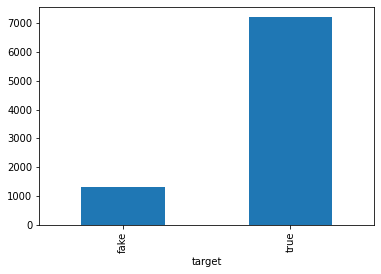

In [ ]:
from matplotlib import pyplot as plt
print(data.groupby(['target'])['headline'].count())
data.groupby(['target'])['headline'].count().plot(kind="bar")
plt.show()

We will shuffle the data to prevent bias:


In [ ]:
data= data.sample(frac = 1)

In [ ]:
data.head(20)

,articleID,category,headline,content,target
5216,NaN,International,"শত্রুর অবরোধ ভাঙতে রক্ত দেয়ার সিদ্ধান্ত, নজিরব...",ফিলিস্তিনের ইসলামি প্রতিরোধ আন্দোলন হামাসের রা...,true
8022,NaN,Politics,মেডিকেল বোর্ডের ‘ব্যবস্থাপত্র’ জানানো হলো খালে...,ঢাকা: দুর্নীতি মামলায় কারাবন্দি বিএনপি চেয়ারপা...,true
7453,NaN,National,মীরসরাইয়ে জঙ্গি আস্তানায় ২ জেএমবির মরদেহ উদ্ধার,চট্টগ্রামের মীরসরাইয়ে জঙ্গি আস্তানা থেকে ২ জেএ...,true
1055,NaN,Politics,"বিএনপি আতঙ্কে, জানালেন ফখরুল",জাতীয় নির্বাচনের বছরে বিএনপিকে দুশ্চিন্তা ও আত...,true
6236,NaN,International,ভারতের সঙ্গে পুনরায় আলোচনায় বসতে মোদিকে ইমরানে...,পাকিস্তানের প্রধানমন্ত্রী ইমরান খান ভারতের সঙ্...,true
3559,NaN,Entertainment,"ভালো আছি, ভালো থেকো...",সালমান শাহ। বাংলা ছবির ক্ষণজন্মা এক নায়ক। অভিন...,true
1076,NaN,National,"যমুনায় পানি বৃদ্ধি, বন্যা পরিস্থিতির অবনতি",যমুনা নদীতে পানি বৃদ্ধি অব্যাহত থাকায় বন্যা পর...,true
3450,NaN,National,‘দারিদ্র্য হার ২১ দশমিক ৮ শতাংশ’,সার্বিক দারিদ্র্যের হার ২০১৮ সালে ২১ দশমিক ৮ শ...,true
5938,NaN,Miscellaneous,"এবার গোবর, গো-মূত্রের সাবান বিক্রি হবে ভারতে",সামাজিক যোগাযোগমাধ্যমে ভারতে মাঝেমাজে অনলাইনে ...,true
4792,NaN,Entertainment,২৬ বছরের অভিনেত্রীর সঙ্গে ৭০ বছরের মহেশ ভাটের ...,﻿﻿এক তরুণ অভিনেত্রীর কাঁধে মাথা রেখেছেন খ্যাতি...,true


Removing the date and label 

Stopwords and Punctuations

In [ ]:
from bnlp.corpus import stopwords, punctuations, letters, digits


punkt not found. downloading...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


**Remove** stopwords, punctuation and digit

In [ ]:
import string
def punctuation_removal(text):
    all_list = [char for char in text if char not in (punctuations)]
    clean_str = ''.join(all_list)
    return clean_str
data['headline'] = data['headline'].apply(punctuation_removal)
print(data['headline'])

5216    শত্রুর অবরোধ ভাঙতে রক্ত দেয়ার সিদ্ধান্ত নজিরবি...
8022    মেডিকেল বোর্ডের ‘ব্যবস্থাপত্র’ জানানো হলো খালে...
7453      মীরসরাইয়ে জঙ্গি আস্তানায় ২ জেএমবির মরদেহ উদ্ধার
1055                          বিএনপি আতঙ্কে জানালেন ফখরুল
6236    ভারতের সঙ্গে পুনরায় আলোচনায় বসতে মোদিকে ইমরানে...
                              ...                        
4747           চট্টগ্রামে অস্ত্রগুলিসহ দুই যুবক গ্রেপ্তার
618     এখন থেকে আর এডিট করা ছবি আপলোড দেয়া যাবেনা  ফ...
4164                      ঢাবিতে ক্ষুদে গবেষকদের মিলনমেলা
3290             দশ বছর পর আরেকটি অভিষেকের অপেক্ষায় কোহলি
3139                               আমাকে এখনও কেউ চেনে না
Name: headline, Length: 8501, dtype: object


In [ ]:
import string
def stopword_removal(text):
    all_list = [char for char in text if char not in stopwords]
    clean_str = ''.join(all_list)
    return clean_str
data['headline'] = data['headline'].apply(stopword_removal)
print(data['headline'])

5216    শত্ু অবোধ ভাঙতে ক্ত দেয়া সিদ্ধান্ত নজিবিহীন ষড়...
8022      মেডিকেল বো্ডে ‘ব্যবস্থাপত্’ জানানো হলো খালেদাকে
7453             মীসায়ে জঙ্গি আস্তানায় ২ জেমবি মদেহ উদ্ধা
1055                            বিনপি আতঙ্কে জানালেন ফখুল
6236       ভাতে সঙ্গে পুনায় আলোচনায় বসতে মোদিকে মানে চিঠি
                              ...                        
4747                চট্টগ্ামে অস্ত্গুলিসহ দু যুবক গ্েপ্তা
618       খন থেকে আ ডিট কা ছবি আপলোড দেয়া যাবেনা  ফেসবুক
4164                       ঢাবিতে ক্ষুদে গবেষকদে মিলনমেলা
3290                 দশ বছ প আেকটি অভিষেকে অপেক্ষায় কোহলি
3139                                 আমাকে খন কেউ চেনে না
Name: headline, Length: 8501, dtype: object


In [ ]:
import string
def digit_removal(text):
    all_list = [char for char in text if char not in digits]
    clean_str = ''.join(all_list)
    return clean_str
data['headline'] = data['headline'].apply(digit_removal)
print(data['headline'])

5216    শত্ু অবোধ ভাঙতে ক্ত দেয়া সিদ্ধান্ত নজিবিহীন ষড়...
8022      মেডিকেল বো্ডে ‘ব্যবস্থাপত্’ জানানো হলো খালেদাকে
7453              মীসায়ে জঙ্গি আস্তানায়  জেমবি মদেহ উদ্ধা
1055                            বিনপি আতঙ্কে জানালেন ফখুল
6236       ভাতে সঙ্গে পুনায় আলোচনায় বসতে মোদিকে মানে চিঠি
                              ...                        
4747                চট্টগ্ামে অস্ত্গুলিসহ দু যুবক গ্েপ্তা
618       খন থেকে আ ডিট কা ছবি আপলোড দেয়া যাবেনা  ফেসবুক
4164                       ঢাবিতে ক্ষুদে গবেষকদে মিলনমেলা
3290                 দশ বছ প আেকটি অভিষেকে অপেক্ষায় কোহলি
3139                                 আমাকে খন কেউ চেনে না
Name: headline, Length: 8501, dtype: object


Tokenize Dataset

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])
data["headline"] = data["headline"].apply(lambda x: stem_words(x))
print(data["headline"])

5216    শত্ু অবোধ ভাঙতে ক্ত দেয়া সিদ্ধান্ত নজিবিহীন ষড়...
8022      মেডিকেল বো্ডে ‘ব্যবস্থাপত্’ জানানো হলো খালেদাকে
7453               মীসায়ে জঙ্গি আস্তানায় জেমবি মদেহ উদ্ধা
1055                            বিনপি আতঙ্কে জানালেন ফখুল
6236       ভাতে সঙ্গে পুনায় আলোচনায় বসতে মোদিকে মানে চিঠি
                              ...                        
4747                চট্টগ্ামে অস্ত্গুলিসহ দু যুবক গ্েপ্তা
618        খন থেকে আ ডিট কা ছবি আপলোড দেয়া যাবেনা ফেসবুক
4164                       ঢাবিতে ক্ষুদে গবেষকদে মিলনমেলা
3290                 দশ বছ প আেকটি অভিষেকে অপেক্ষায় কোহলি
3139                                 আমাকে খন কেউ চেনে না
Name: headline, Length: 8501, dtype: object


In [ ]:
import pandas as pd
import nltk
a = data['headline'].str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)
word_dist.most_common(50) 
#print (word_dist)

[('’', 625),
 ('‘', 543),
 ('না', 451),
 ('নিহত', 325),
 ('থেকে', 259),
 ('কে', 253),
 ('নিয়ে', 239),
 ('দু', 234),
 ('আটক', 212),
 ('হবে', 199),
 ('প্ধানমন্ত্ী', 196),
 ('দৈনিক', 193),
 ('মতিকণ্ঠ', 192),
 ('প', 188),
 ('বাংলাদেশ', 188),
 ('bengal', 181),
 ('beat', 181),
 ('মৃত্যু', 179),
 ('বিনপি', 174),
 ('খালেদা', 168),
 ('হত্যা', 160),
 ('সঙ্গে', 156),
 ('কা', 156),
 ('সেপ্টেম্ব', 149),
 ('উদ্ধা', 147),
 ('ক', 141),
 ('টাকা', 141),
 ('শুু', 138),
 ('বাংলাদেশে', 137),
 ('কতে', 136),
 ('যে', 127),
 ('জন্য', 124),
 ('নে', 119),
 ('আ', 118),
 ('টি', 112),
 ('হচ্ছে', 112),
 ('গ্েফতা', 110),
 ('শিশু', 109),
 ('বন্ধ', 109),
 ('ভাতে', 106),
 ('মামলা', 103),
 ('নেতা', 102),
 ('নতুন', 102),
 ('দিয়ে', 102),
 ('বিুদ্ধে', 98),
 ('অভিযোগ', 98),
 ('সিনহা', 98),
 ('বা', 97),
 ('সড়ক', 96),
 ('ডিজিটাল', 95)]

plot the confusion matrix

In [ ]:
from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)
X_train,X_test,y_train,y_test = train_test_split(data['headline'], data.target, test_size=0.2, random_state=42)

In [ ]:
X_train.count()

6800

In [ ]:
X_test.count()

1701

Vectorizing and applying TF-IDF

In [ ]:

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
pipe2 = Pipeline([('vect', CountVectorizer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])


# Fitting the model
model = pipe.fit(X_train, y_train)
model2=pipe2.fit(X_train, y_train)
# Accuracy
prediction = model.predict(X_test)
prediction2 = model2.predict(X_test)
print("After using Tfidf and Countvectorization the of the model is accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print("After using Countvectorization the of the model is accuracy: {}%".format(round(accuracy_score(y_test, prediction2)*100,2)))

After using Tfidf and Countvectorization the of the model is accuracy: 88.36%
After using Countvectorization the of the model is accuracy: 89.12%


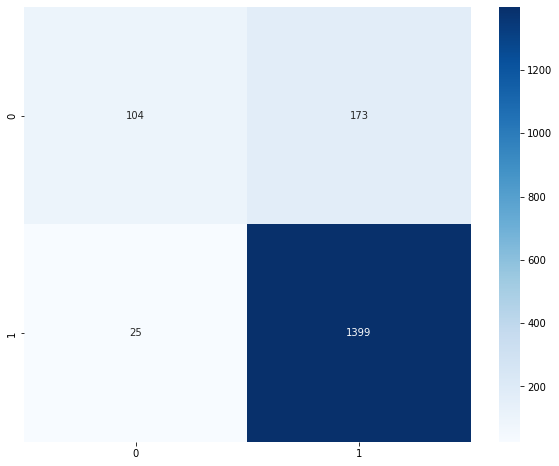

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
cf_train_matrix = confusion_matrix(y_test, prediction)
plt.figure(figsize=(10,8))
sns.heatmap(cf_train_matrix, annot=True, fmt='d',cmap='Blues')

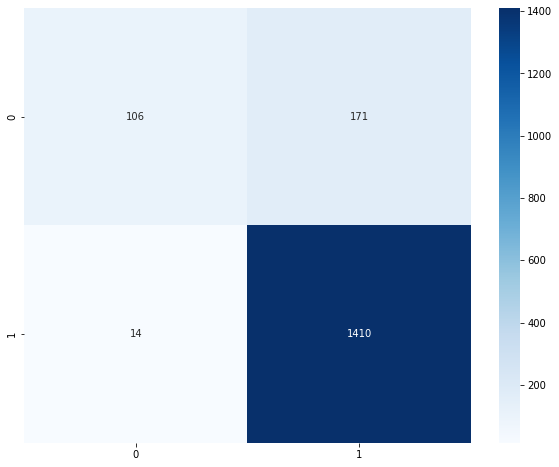

In [ ]:

cf_train_matrix = confusion_matrix(y_test, prediction2)
plt.figure(figsize=(10,8))
sns.heatmap(cf_train_matrix, annot=True, fmt='d',cmap='Blues')

In [ ]:

cr = classification_report(y_test, prediction)
print(confusion_matrix(y_test, prediction))
print("\n\nClassification Report\n")
print(cr)

[[ 104  173]
 [  25 1399]]


Classification Report

              precision    recall  f1-score   support

        fake       0.81      0.38      0.51       277
        true       0.89      0.98      0.93      1424

    accuracy                           0.88      1701
   macro avg       0.85      0.68      0.72      1701
weighted avg       0.88      0.88      0.87      1701



In [ ]:
cr = classification_report(y_test, prediction2)
print(confusion_matrix(y_test, prediction2))
print("\n\nClassification Report\n")
print(cr)

[[ 106  171]
 [  14 1410]]


Classification Report

              precision    recall  f1-score   support

        fake       0.88      0.38      0.53       277
        true       0.89      0.99      0.94      1424

    accuracy                           0.89      1701
   macro avg       0.89      0.69      0.74      1701
weighted avg       0.89      0.89      0.87      1701

